CREDIT: https://www.youtube.com/watch?v=i8NETqtGHms and https://www.tensorflow.org/tutorials/keras/classification 

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
print('Shape of training set: ')
print(train_images.shape)
print('Shape of testing set: ')
print(len(train_labels))

Shape of training set: 
(60000, 28, 28)
Shape of testing set: 
60000


Preprocess training data

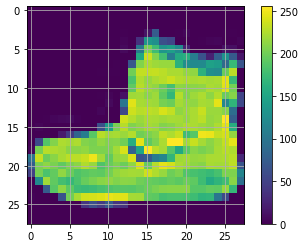

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()


In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

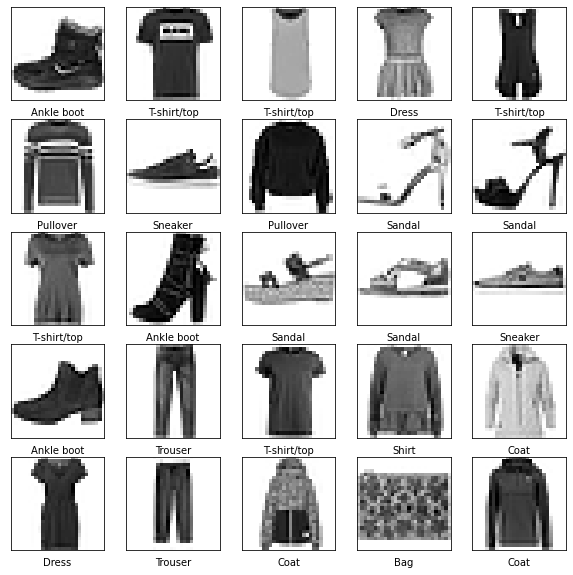

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

ML Model Build

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

ML Model Train

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.5013 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.3802 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.3386 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.3138 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.2971 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.2805 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.2680 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2578 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2483 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 2s 916u

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3653 - accuracy: 0.8758 - 329ms/epoch - 1ms/step

Test accuracy: 0.8758000135421753


Predictions

In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

print(predictions[0])

np.argmax(predictions[0])



313/313 [==============================] - 0s 646us/step
[9.4816350e-08 2.7747659e-12 2.3460078e-10 1.2767861e-12 3.4666405e-09
 1.7276221e-04 3.4851444e-09 3.3733550e-02 4.4885994e-08 9.6609360e-01]


9

In [41]:
print('Expected: ')
print(test_labels[0])

Expected: 
9


In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

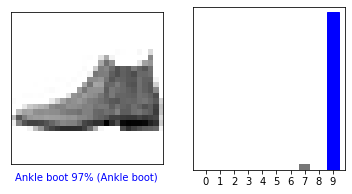

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

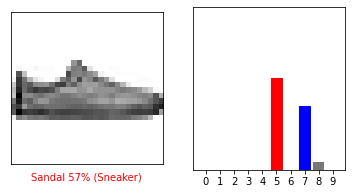

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

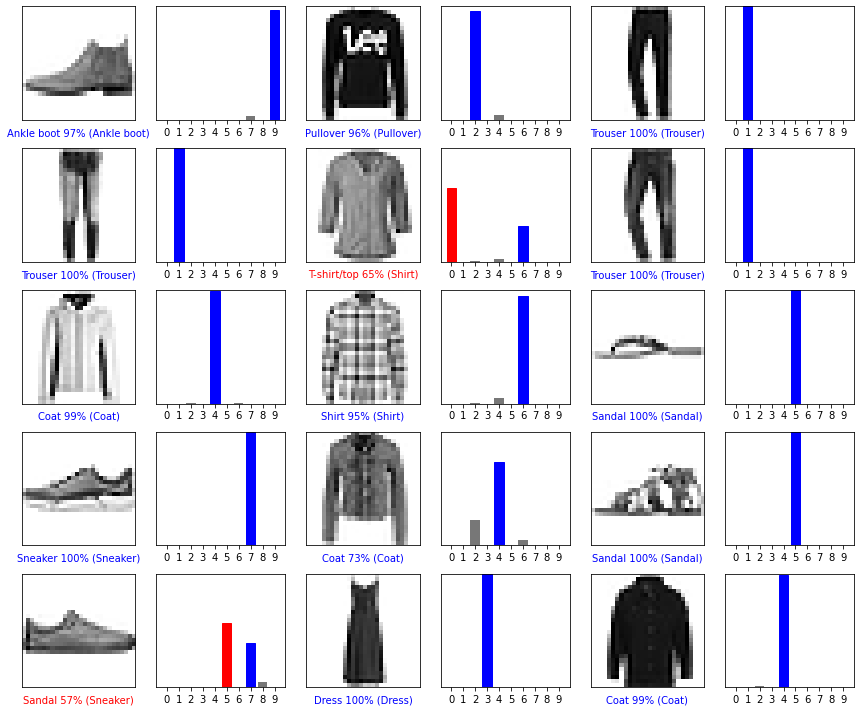

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()